<a href="https://colab.research.google.com/github/tjdux/ML/blob/main/08_stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 점진적인 학습
- 점진적 학습
  - 훈련 데이터가 한 번에 준비되는 것이 아닌 조금씩 전달될 때
  - 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련
  - 확률적 경사 하강법 (SDG; stochastic gradient descent)가 대표적인 점진적 학습 알고리즘

### 확률적 경사 하강법
- 경사 하강법
  - 경사를 따라 내려가는 방법
  - 원하는 지점까지 내려갈 수 있는 가장 빠른 길은 가장 가파른 길
  - 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표
- 확률적 경사 하강법
  - 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요
  - 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려감
  - 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감
  - 전체 샘플을 모두 사용할 때까지 계속
- 에포크 (epoch)
  - 훈련 세트를 한 번 모두 사용하는 과정
  - 전체 샘플을 모두 사용해도 원하는 지점에 도달하지 못하면 훈련 세트에 모든 샘플을 다시 채워 넣음
  - 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려감
  - 만족할만한 위치에 도달할 때까지 계속 내려감
  - 일반적으로 경사 하강법은 수십, 수백 번 이상의 에포크 수행
- 미니배치 경사 하강법 (minibatch gradient descent): 여러 개의 샘플을 사용해 경사 하강법 수행
- 배치 경사 하강법 (batch gradient descent)
  - 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용
  - ➕ 가장 안정적
  - ➖ 그만큼 컴퓨터 자원을 많이 사용
- 신경망 알고리즘: 확률적 경사 하강법이나 미니배치 경사 하강법 사용

### 손실 함수 (loss function)
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
- 값이 작을수록 바람직
- 손실 함수와 비용 함수
  - 손실 함수: 샘플 하나에 대한 손실을 정의
  - 비용 함수: 모든 샘플의 손실 함수의 합
- 미분 가능해야 함 (연속적이어야 함)
- 확률은 연속적!

### 로지스틱 손실 함수
- 예측 확률을 이용
- 예측 확률에 로그 함수를 적용
  - 예측 확률의 범위는 0 ~ 1로 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수
  - 0에 가까울수록 로그 함수는 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 끼칠 수 있음
- 로지스틱 손실 함수 (logistic loss function)
  - 양성 클래스 (타깃 = 1)일 때 손실은 -log(예측확률)로 계산 ➡️ 확률이 1에서 멀어져 0에 가까워질수록 손실은 아주 큰 양수
  - 음성 클래스 (타깃 = 0)일 때 손실은 -log(1-예측확률)로 계산 ➡️ 예측 확률이 0에서 멀어져 1에 가까워질수록 손실은 아주 큰 양수
  - 이진 분류에 사용
- 크로스엔트로피 손실 함수 (cross-entropy function)
  - 다중 분류에 사용
- 평균 제곱 오차 (mean squared error)
  - 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값
  - 회귀에서 사용

## SDGClassifier

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [4]:
cols = fish.columns
cols

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [5]:
fish_input = fish[cols[1:]].to_numpy()
fish_target = fish[cols[0]].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [8]:
# ⚠️ 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환!
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
# loss: 손실 함수의 종류 지정
# OvR: 다중 분류에서 로지스틱 손실 함수를 사용하면 클래스마다 이진 분류 모델을 만듦
# max_iter: 수행할 에포크 횟수 지정
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(f"훈련 세트 점수: {sc.score(train_scaled, train_target)}")
print(f"테스트 세트 점수: {sc.score(test_scaled, test_target)}")

훈련 세트 점수: 0.773109243697479
테스트 세트 점수: 0.775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [13]:
# partial_fit(): 점진적 학습, 호출할 때마다 1 에포크씩 이어서 훈련
sc.partial_fit(train_scaled, train_target)
print(f"훈련 세트 점수: {sc.score(train_scaled, train_target)}")
print(f"테스트 세트 점수: {sc.score(test_scaled, test_target)}")

훈련 세트 점수: 0.7983193277310925
테스트 세트 점수: 0.775


## 에포크와 과대/과소적합
- 에포크 횟수가 적으면
  - 모델이 훈련 세트를 덜 학습
  - 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성 높음
- 에포크 횟수가 많으면
  - 훈련 세트를 완전히 학습
  - 모델이 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 낮은 과대적합된 모델일 가능성 높음
- 조기 종점 (early stopping)
  - 과대적합이 시작하기 전에 훈련을 멈추는 것
  - 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작
  - 훈련 세트 점수와 테스트 세트 점수와의 차이가 벌어지기 시작하는 점이 모델이 과대적합되기 시작하는 곳

In [14]:
# partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 전달
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [15]:
# 300번의 에포크
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

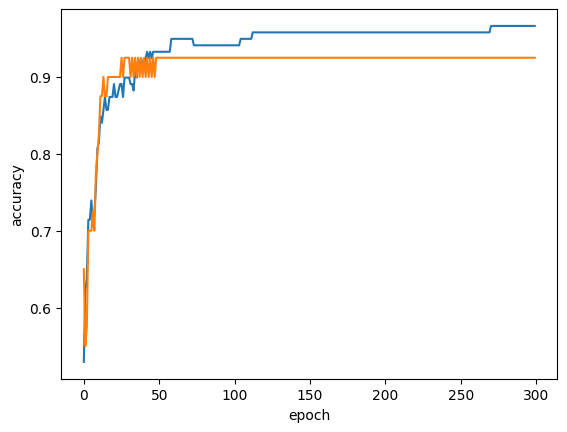

In [16]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 에포크 100부터 과대적합되기 시작

In [18]:
# max_iter=100: 에포크 100

sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(f"훈련 세트 점수: {sc.score(train_scaled, train_target)}")
print(f"테스트 세트 점수: {sc.score(test_scaled, test_target)}")

훈련 세트 점수: 0.957983193277311
테스트 세트 점수: 0.925


- loss 매개변수의 기본값은 'hinge'
- 힌지 손실 (hinge loss): 서포트 벡터 머신 (SVM) 알고리즘을 위한 손실 함수

In [19]:
# 힌지 손실 사용
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(f"훈련 세트 점수: {sc.score(train_scaled, train_target)}")
print(f"테스트 세트 점수: {sc.score(test_scaled, test_target)}")

훈련 세트 점수: 0.9495798319327731
테스트 세트 점수: 0.925
